<a href="https://colab.research.google.com/github/Rajitha-SL/My-AI-Projects/blob/AI-and-ML-learning/Image_augmentations_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

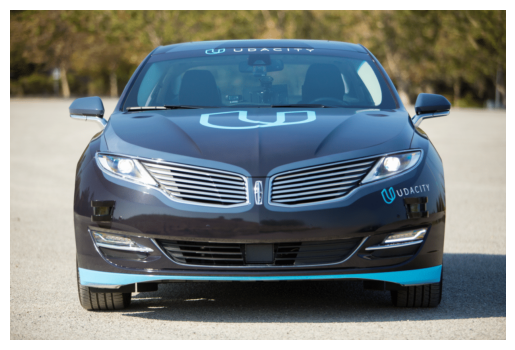

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# TODO: Feel free to try out your own image here by changing img_path
# to a file path to another image on your computer
img_path = 'udacity_sdc.png'

# Load color image
img = Image.open(img_path)

# Plot image
plt.imshow(img)
_ = plt.axis('off')

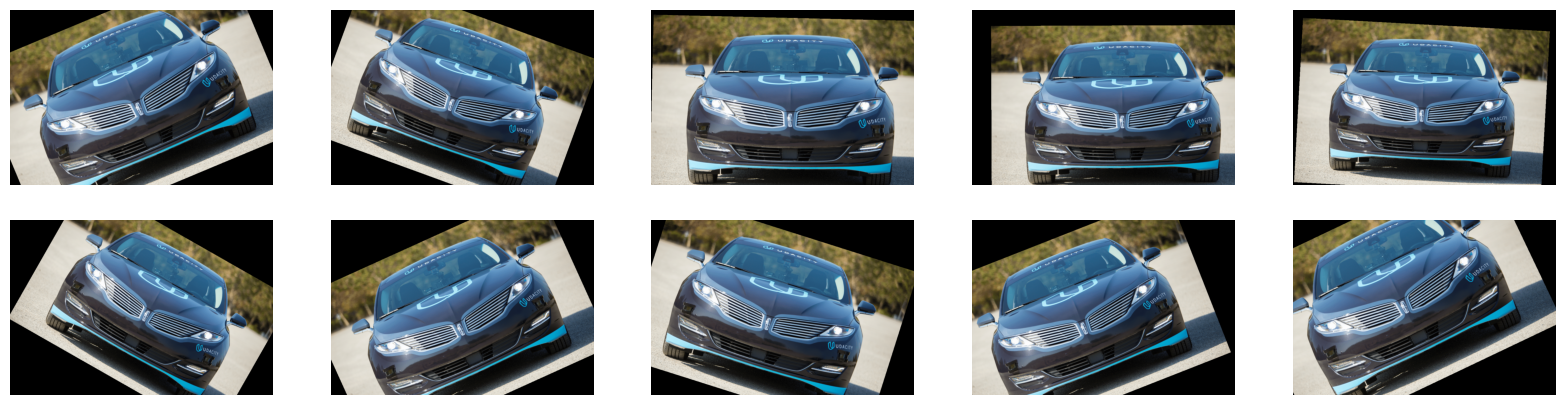

In [5]:
import torchvision.transforms as T
transform = T.RandomAffine(
    # Random rescaling between 90% and 110% of the
    # original
    scale = (0.9, 1.1),
    # Random translation to the left or to the right
    # by up to 10%
    translate = (0.1, 0.1),
    # Random rotation up to 30 degrees
    degrees = 30,
    fill = 0,
    interpolation=T.InterpolationMode.BILINEAR,
)

# Now let's push the image a few times through the random transform and
# see the results
fig, subs = plt.subplots(2, 5, figsize=(20,5))

for i, sub in enumerate (subs.flatten()):
  # Apply transform
  this_image = transform(img)
  _ = sub.imshow(this_image)
  sub.axis('off')

In [6]:
train_transforms = T.Compose(
    [
    # The size here depends on the application. Here let's use 256x256
    T.Resize(256),
    # Let's apply random affine transformations (rotation, translation, shear)
    # (don't overdo here)
    T.RandomAffine(scale = (0.9, 1.1), translate=(0.1, 0.1), degrees= 30),
    # Color modifications. Here I exaggerate to show the effect
    T.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    # Apply an horizontal flip with 50% probability (i.e., if you pass
    # 100 images through around half of them will undergo the flipping)
    T.RandomHorizontalFlip(0.5),
    # Finally take a 224x224 random part of the image
    T.RandomCrop(224, padding_mode = 'reflect', pad_if_needed=True),
    T.ToTensor(),
    T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

During Validation and Test you typically don't want to apply image augmentation. (Which is needed for trainging). Hence we use a simple transform pipeline as follows.

In [7]:
testval_transforms = T.Compose(
    [
        # The size here depends on your application. Here let's use 256x256
        T.Resize(256),
        # Let's take the central 224x224 part of the image
        T.CenterCrop(224),
        T.ToTensor(),
        T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

Note that

*   Resize and crop should be the same as applied during training for the best performanc
*   Then normalization should be the same between training and inference (validation and test)



AutoAugment Transforms

In [8]:
num_ops =  "the number of random transformations applied. Defaut: 2"
magnitude = " the strength of the augmentations."
T.RandAugment(num_ops, magnitude)

RandAugment(num_ops=the number of random transformations applied. Defaut: 2, magnitude= the strength of the augmentations., num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)

In a convolutional block add the BatchNorm just after the covolutional layer

nn.BatchNorm2d - Following is an example

In [16]:
import torch.nn as nn
conv1 = torch.nn.Sequential(
    nn.Conv2d(3, 16, kernel_size = 3, padding = 1),
    nn.BatchNorm2d(16), # input of the feature maps, which is the
    # number of output channels of the convolutional layer
    # Use BatchNorm before the Dropout
    nn.MaxPool2d(2,2),
    nn.ReLU(),
    nn.Dropout2d(0.2)
)

Using BatchNorm for a Dense Layer

In [19]:
mlp = nn.Sequential(
    nn.Linear(1024, 500),
    nn.BatchNorm1d(500),
    nn.ReLU(),
    nn.Dropout(0.5)
)